This project .......

Import used libraries:

In [255]:
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer  
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error 
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from scipy import stats

Load data and general description of data

In [256]:
df=pd.read_excel("C:\\Users\\khans\\OneDrive\\Desktop\\python_work\\cured_data.xlsx")
print(df.head())
df.info()
df.describe()

   age     sex  occupation family_hx concomittent_dx  duration_before  \
0   22    male      others        no            none              2.0   
1   55    male      farmer        no            none              4.0   
2   35    male      farmer        no            none             25.0   
3   29    male      others        no            none              9.0   
4   23  female  house wife        no            none              5.0   

         site size_1st_presenation organism                 x_ray  \
0  right foot         from 5 to 10       AM                   NaN   
1   left foot         more than 10       SS           combination   
2  right ahnd             operated       SS                   NaN   
3  right foot         from 5 to 10       SS                   NaN   
4   left foot         from 5 to 10       SS  soft tissue swelling   

  sinuses_1st_presentation surgery_pre_tx                         type_tx  \
0                   active           once  Amoclan + Septrin + Folic 

,age,duration_before,duration_tx
count,76.000000,73.000000,76.000000
mean,30.552632,6.273973,16.894737
std,13.987037,7.596162,10.126637
min,9.000000,1.000000,3.000000
25%,20.000000,2.000000,11.000000
50%,28.000000,4.000000,15.000000
75%,40.000000,8.000000,21.000000
max,70.000000,45.000000,53.000000


Plot histograms and scatter matrices of the numerical variables:

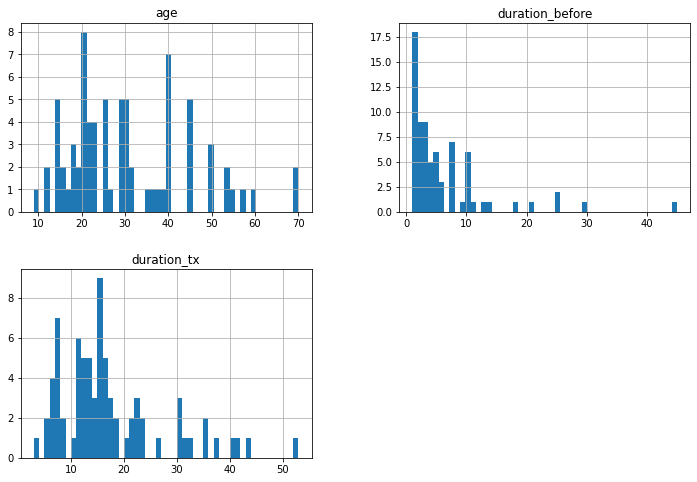

In [257]:
df.hist(bins=50, figsize=(12, 8))
plt.show()

array([[<AxesSubplot:xlabel='duration_tx', ylabel='duration_tx'>,
        <AxesSubplot:xlabel='age', ylabel='duration_tx'>,
        <AxesSubplot:xlabel='duration_before', ylabel='duration_tx'>],
       [<AxesSubplot:xlabel='duration_tx', ylabel='age'>,
        <AxesSubplot:xlabel='age', ylabel='age'>,
        <AxesSubplot:xlabel='duration_before', ylabel='age'>],
       [<AxesSubplot:xlabel='duration_tx', ylabel='duration_before'>,
        <AxesSubplot:xlabel='age', ylabel='duration_before'>,
        <AxesSubplot:xlabel='duration_before', ylabel='duration_before'>]],
      dtype=object)

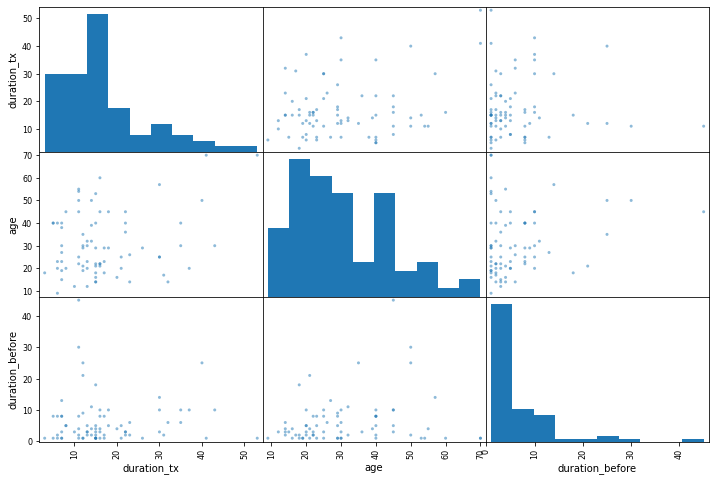

In [258]:
attributes=['duration_tx', 'age', 'duration_before']
scatter_matrix(df[attributes], figsize=(12,8))

Separate test data:

In [259]:
train_set, test_set= train_test_split (df, test_size=0.2, random_state=42)
print(len(train_set))
print(len(test_set))

60
16


Prepare the data for Machine learning Algorithms:

In [260]:
mycetoma = train_set.drop("duration_tx", axis=1)
mycetoma_labels = train_set["duration_tx"].copy()

In [286]:
numerical_variables = ['age', 'duration_before']
categorical_variables = ['sex', 'occupation', 'family_hx', 'concomittent_dx', 'site', 'organism', 'x_ray', 'size_1st_presenation',
                     'sinuses_1st_presentation', 'surgery_pre_tx', 'type_tx', 'side_effects','surgery_during_tx',
                     'missed_followups', 'regular_tx']
num_pipeline = make_pipeline(SimpleImputer(strategy='median'), StandardScaler())
    
cat_pipeline = make_pipeline (
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder(handle_unknown="ignore"))

preprocessing = ColumnTransformer([
    ("num", num_pipeline, numerical_variables),
    ("cat", cat_pipeline, categorical_variables),
])

1. Linear Regression:

In [287]:
# Fit the model and compare the first 5 predictions to actual data:
lin_reg=make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(mycetoma, mycetoma_labels)
mycetoma_predictions = lin_reg.predict(mycetoma)
print(mycetoma_predictions[:5])
print(mycetoma_labels.iloc[:5].values)

# Calculate the Mean squared error on the whole training set:
lin_rmse = mean_squared_error(mycetoma_labels, mycetoma_predictions,
                              squared=False)
print(lin_rmse)

# Cross-validation:
lin_rmses = -cross_val_score(lin_reg, mycetoma, mycetoma_labels,
                              scoring="neg_root_mean_squared_error", cv=10)
lin_rmse_mean = np.mean(lin_rmses)
print(lin_rmse_mean)
pd.Series(lin_rmses).describe()





[19.20680731 15.30315386 29.99999985  6.99999968 21.99999939]
[15 14 30  7 22]
2.8744047955689274
17.804758057690076


count    10.000000
mean     17.804758
std       4.537812
min      11.856548
25%      13.248005
50%      18.556339
75%      21.744212
max      23.535468
dtype: float64

2. Decision Tree Regressor:

In [288]:
# Fit the model and compare the first 5 predictions to actual data:
tree_reg = make_pipeline(preprocessing, DecisionTreeRegressor(random_state=42))
tree_reg.fit(mycetoma, mycetoma_labels)
mycetoma_predictions = tree_reg.predict(mycetoma)
print(mycetoma_predictions[:5])
print(mycetoma_labels.iloc[:5].values)

# Calculate the Mean squared error on the whole training set:
tree_rmse = mean_squared_error(mycetoma_labels, mycetoma_predictions,
                              squared=False)
print(tree_rmse)

# Cross-validation:
tree_rmses = -cross_val_score(tree_reg, mycetoma, mycetoma_labels,
                              scoring="neg_root_mean_squared_error", cv=10)
tree_rmse_mean = np.mean(tree_rmses)
print(tree_rmse_mean)
pd.Series(tree_rmses).describe()


[15. 14. 30.  7. 22.]
[15 14 30  7 22]
0.0
11.556585182670002


count    10.000000
mean     11.556585
std       4.616236
min       5.016639
25%       8.848109
50%      10.219974
75%      15.272839
max      18.663690
dtype: float64

3. Random Forests:

In [289]:
# Fit the model and compare the first 5 predictions to actual data:
forest_reg = make_pipeline(preprocessing,
                           RandomForestRegressor(random_state=42))
forest_reg.fit(mycetoma, mycetoma_labels)
mycetoma_predictions = forest_reg.predict(mycetoma)

# Calculate the Mean squared error on the whole training set:
forest_rmse = mean_squared_error(mycetoma_labels, mycetoma_predictions,
                                 squared=False)
print(forest_rmse)

# Cross validation:
forest_rmses = -cross_val_score(forest_reg, mycetoma, mycetoma_labels,
                                scoring="neg_root_mean_squared_error", cv=10)
forest_rmse_mean = np.mean(forest_rmses)
print(forest_rmse_mean)
pd.Series(forest_rmses).describe()

3.0706264290314884
8.11441895581748


count    10.000000
mean      8.114419
std       2.658035
min       4.547800
25%       6.630533
50%       7.494192
75%       9.364410
max      14.126300
dtype: float64

Evaluate models on test data:

In [290]:
# split test data:
X_test = test_set.drop('duration_tx', axis=1)
y_test = test_set['duration_tx'].copy()


1. Evaluate linear regression:

In [291]:
    #RMSE:
linear_predictions = lin_reg.predict(X_test)
test_rmse_linreg = mean_squared_error(y_test, linear_predictions, squared=False)
print(test_rmse_linreg)
    #confidance interval:
confidence = 0.95
squared_errors = (linear_predictions- y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

13.90483664608284


array([ 7.19751463, 18.29985649])

2. Evaluate decision tree:

In [292]:
    #RMSE:
tree_predictions = tree_reg.predict(X_test)
test_rmse_treereg = mean_squared_error(y_test, tree_predictions, squared=False)
print(test_rmse_treereg)
    #confidance interval:
confidence = 0.95
squared_errors = (tree_predictions- y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

9.611191393370543


array([ 5.85495469, 12.26660122])

3. Evaluate Random forest:

In [293]:
    #RMSE:
randforest_predictions = forest_reg.predict(X_test)
test_rmse_forestreg = mean_squared_error(y_test, randforest_predictions, squared=False)
print(test_rmse_forestreg)
    #confidance interval:
confidence = 0.95
squared_errors = (randforest_predictions- y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

8.25095297526292


array([ 2.85662305, 11.31353856])

Compring the algorithms:

In [294]:
columns = {'RMSE_training_set': [lin_rmse, tree_rmse, forest_rmse],
        'RMSE_validation_set': [lin_rmse_mean, tree_rmse_mean, forest_rmse_mean],
        'RMSE_test_set': [test_rmse_linreg, test_rmse_treereg, test_rmse_forestreg]}

row_names = ['Linear_Regression', 'Decision_tress', 'Random_forests']

df_alg_comparisons = pd.DataFrame(columns, index=row_names)

print(df_alg_comparisons)

                   RMSE_training_set  RMSE_validation_set  RMSE_test_set
Linear_Regression           2.874405            17.804758      13.904837
Decision_tress              0.000000            11.556585       9.611191
Random_forests              3.070626             8.114419       8.250953
